In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 폰트매니저와 matplotlib 전체 가져오기
import matplotlib.font_manager as fm
import matplotlib

# 원하는 폰트의 경로
font_name = 'gulim'
font_path = f'C:/Windows/Fonts/{font_name}.ttc'

# 폰트의 이름을 가져오고 설정 저장
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

# 한글 폰트 오류가 날 경우 추가
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 데이터 로드 - 원본 파일
df = pd.read_csv('./data/tracks_prepared.csv')
df

,artist_followers,artist_popularity,explicit,tempo,album_release_date,energy,key,popularity,speechiness,danceability,valence,acousticness,liveness,instrumentalness,loudness,year,decade,hit_category
0,2338837.0,74.0,0,97.129,2018,0.123,7.0,0.0,0.0407,0.373,0.138,0.94800,0.0816,0.000000,-15.193,2018,2010,0
1,84914.0,51.0,0,103.773,1996,0.453,5.0,71.0,0.0348,0.744,0.122,0.62700,0.0898,0.421000,-11.977,1996,1990,1
2,59150.0,54.0,0,122.030,2014,0.878,9.0,0.0,0.0357,0.747,0.897,0.07940,0.3700,0.000531,-5.209,2014,2010,0
3,1528.0,0.0,0,84.099,2001,0.484,7.0,0.0,0.0356,0.604,0.564,0.10000,0.0865,0.000000,-7.097,2001,2000,0
4,6776.0,28.0,0,156.017,2014,0.447,0.0,7.0,0.0613,0.761,0.761,0.06160,0.0822,0.873000,-10.961,2014,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751624,37474.0,33.0,0,128.011,2022,0.709,2.0,12.0,0.0528,0.807,0.740,0.00232,0.0445,0.786000,-11.361,2022,2020,0
751625,40725.0,36.0,0,123.006,2022,0.743,11.0,28.0,0.0532,0.803,0.176,0.00120,0.0618,0.308000,-6.241,2022,2020,0
751626,10523.0,32.0,0,92.999,2016,0.756,1.0,0.0,0.0376,0.655,0.401,0.00992,0.3370,0.028000,-7.407,2016,2010,0
751627,43895.0,42.0,0,85.571,2017,0.636,3.0,0.0,0.0343,0.596,0.409,0.05580,0.0629,0.000000,-8.882,2017,2010,0


In [4]:
# year와 겹치는 컬럼 album_release_date 제거
df = df.drop('album_release_date', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751629 entries, 0 to 751628
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   artist_followers   751629 non-null  float64
 1   artist_popularity  751629 non-null  float64
 2   explicit           751629 non-null  int64  
 3   tempo              751629 non-null  float64
 4   energy             751629 non-null  float64
 5   key                751629 non-null  float64
 6   popularity         751629 non-null  float64
 7   speechiness        751629 non-null  float64
 8   danceability       751629 non-null  float64
 9   valence            751629 non-null  float64
 10  acousticness       751629 non-null  float64
 11  liveness           751629 non-null  float64
 12  instrumentalness   751629 non-null  float64
 13  loudness           751629 non-null  float64
 14  year               751629 non-null  int64  
 15  decade             751629 non-null  int64  
 16  hi

In [ ]:
# 데이터 로드 - 장르 파일
df_genre = pd.read_csv('./data/tracks_genres.csv')

In [ ]:
# 문자열을 리스트로 변환
from ast import literal_eval
df_genre['genres'] = df_genre['genres'].apply(literal_eval)

In [25]:
# 스타 파워와 흥행의 연관성
# artist_followers + artist_popularity + popularity + hit_category + genres
star_power_col = ['artist_followers', 'artist_popularity', 'popularity', 'hit_category', 'year', 'decade']

df_star = df[star_power_col]
df_star['genres'] = df_genre['genres']

df_star

C:\Users\bsjun\AppData\Local\Temp\ipykernel_27448\3564399167.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_star['genres'] = df_genre['genres']


,artist_followers,artist_popularity,popularity,hit_category,year,decade,genres
0,2338837.0,74.0,0.0,0,2018,2010,"[indie pop, la indie, pov: indie]"
1,84914.0,51.0,71.0,1,1996,1990,"[lilith, new wave pop]"
2,59150.0,54.0,0.0,0,2014,2010,"[deep groove house, house, tech house]"
3,1528.0,0.0,0.0,0,2001,2000,[unknown]
4,6776.0,28.0,7.0,0,2014,2010,"[chill lounge, deep chill]"
...,...,...,...,...,...,...,...
751624,37474.0,33.0,12.0,0,2022,2020,"[deep house, float house]"
751625,40725.0,36.0,28.0,0,2022,2020,[melodic techno]
751626,10523.0,32.0,0.0,0,2016,2010,[zouk riddim]
751627,43895.0,42.0,0.0,0,2017,2010,"[chanson, classic french pop, french pop]"


In [ ]:
# 인기도 상위 5% 추출
trend5_threshold = df['popularity'].quantile(0.95)

In [26]:
# 인기도 상위 5% 데이터프레임
df_trend5 = df_star[df_star['popularity'] >= trend5_threshold].reset_index(drop=True)
df_trend5

,artist_followers,artist_popularity,popularity,hit_category,year,decade,genres
0,84914.0,51.0,71.0,1,1996,1990,"[lilith, new wave pop]"
1,23324247.0,84.0,80.0,1,2013,2010,"[conscious hip hop, hip hop, north carolina hi..."
2,108717184.0,100.0,83.0,1,2017,2010,[pop]
3,44345087.0,83.0,80.0,1,2017,2010,"[emo rap, miami hip hop, rap]"
4,11254715.0,80.0,58.0,1,2021,2020,"[latin hip hop, puerto rican pop, reggaeton, t..."
...,...,...,...,...,...,...,...
41882,882.0,50.0,60.0,1,2021,2020,[rain]
41883,6212890.0,77.0,65.0,1,2019,2010,[pop argentino]
41884,5844070.0,74.0,68.0,1,2022,2020,[pop rap brasileiro]
41885,10836.0,48.0,62.0,1,2023,2020,[russelater]


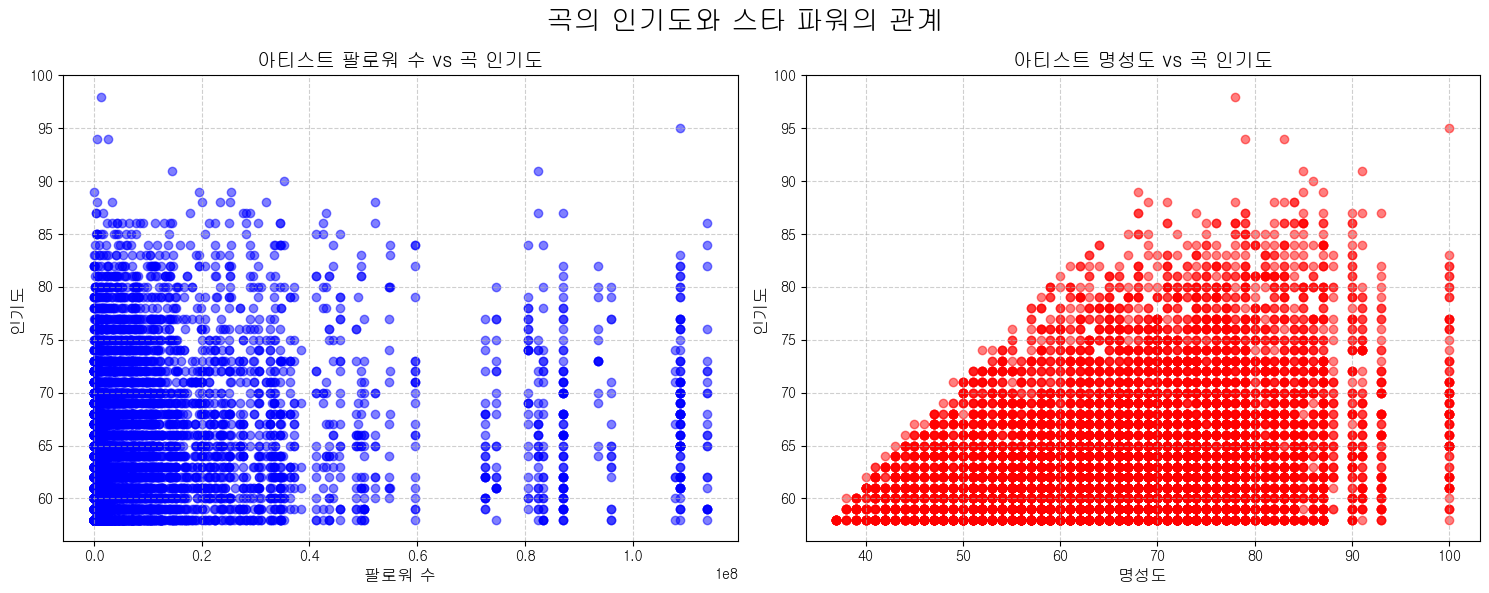

In [ ]:
# 스타 파워와 인기도의 상관관계 시각화
df_sample = df_trend5.sample(n=10000, random_state=42)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
plt.suptitle('곡의 인기도와 스타 파워의 관계', fontsize=20)

# artist_followers vs popularity
axes[0].scatter(df_sample['artist_followers'], df_sample['popularity'], alpha=0.5, color='blue')
axes[0].set_title('아티스트 팔로워 수 vs 곡 인기도', fontsize=14)
axes[0].set_xlabel('팔로워 수', fontsize=12)
axes[0].set_ylabel('인기도', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)

# artist_popularity vs popularity
axes[1].scatter(df_sample['artist_popularity'], df_sample['popularity'], alpha=0.5, color='red')
axes[1].set_title('아티스트 명성도 vs 곡 인기도', fontsize=14)
axes[1].set_xlabel('명성도', fontsize=12)
axes[1].set_ylabel('인기도', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [117]:
# 리스트 형태의 genres 컬럼을 각 행으로 확장
df_trend5_genre_exploded = df_trend5.explode('genres')
df_trend5_genre_exploded

,artist_followers,artist_popularity,popularity,hit_category,year,decade,genres
0,84914.0,51.0,71.0,1,1996,1990,lilith
0,84914.0,51.0,71.0,1,1996,1990,new wave pop
1,23324247.0,84.0,80.0,1,2013,2010,conscious hip hop
1,23324247.0,84.0,80.0,1,2013,2010,hip hop
1,23324247.0,84.0,80.0,1,2013,2010,north carolina hip hop
...,...,...,...,...,...,...,...
41885,10836.0,48.0,62.0,1,2023,2020,russelater
41886,5449040.0,79.0,66.0,1,2024,2020,agronejo
41886,5449040.0,79.0,66.0,1,2024,2020,sertanejo
41886,5449040.0,79.0,66.0,1,2024,2020,sertanejo pop


In [118]:
# 빈도수 가장 높은 장르와 그 수 (상위 5%)
most_frequent_genres = df_trend5_genre_exploded.groupby(['decade', 'genres']).size().reset_index(name='count')

In [119]:
# 연대별 집계
top_frequent_genres = most_frequent_genres.loc[most_frequent_genres.groupby('decade')['count'].idxmax()]

In [53]:
most_frequent_genres

,decade,genres,count
0,1930,adult standards,2
1,1930,big band,1
2,1930,easy listening,1
3,1930,harlem renaissance,1
4,1930,jazz,1
...,...,...,...
6172,2020,yaoi,1
6173,2020,zhenskiy rep,7
6174,2020,zhongguo feng,1
6175,2020,zouk,1


In [114]:
top_frequent_genres

,decade,genres,count
10,1900,classical,30
103,1910,vaudeville,34
152,1920,vintage jazz,27
213,1930,swing,113
229,1940,adult standards,84
487,1950,jazz,1029
781,1960,classic rock,1923
2039,1970,rock,4451
3523,1980,rock,4742
4455,1990,classical,5663


<Figure size 1200x1000 with 0 Axes>

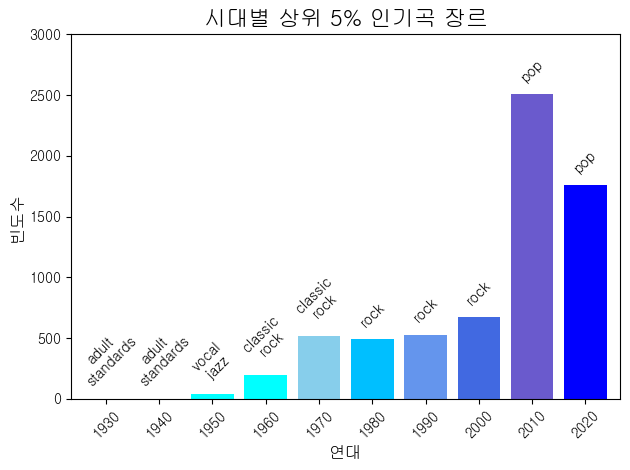

In [121]:
# 시대별 상위 5% 인기곡 장르 시각화
plt.figure(figsize=(12, 10))
bar_colors = ['cyan', 'cyan', 'cyan', 'aqua', 'skyblue',
              'deepskyblue', 'cornflowerblue', 'royalblue', 'slateblue', 'blue']
top_frequent_genres.plot(
    kind='bar',
    x='decade',
    y='count',
    width=0.8,
    color=bar_colors,
    legend=False
)

plt.title('시대별 상위 5% 인기곡 장르', fontsize=16)
plt.xlabel('연대', fontsize=12)
plt.ylabel('빈도수', fontsize=12)

for i, val in enumerate(top_frequent_genres['count']):
    plt.text(i, val+100, top_frequent_genres['genres'].iloc[i].replace(' ', '\n'), ha='center', rotation=45)

plt.xticks(rotation=45)
plt.ylim(0, 3000)
plt.tight_layout()
plt.show()

---
#### 전체 트렌드

In [122]:
# 리스트 형태의 genres 컬럼을 각 행으로 확장
df_star_exploded = df_star.explode('genres')
df_star_exploded

,artist_followers,artist_popularity,popularity,hit_category,year,decade,genres
0,2338837.0,74.0,0.0,0,2018,2010,indie pop
0,2338837.0,74.0,0.0,0,2018,2010,la indie
0,2338837.0,74.0,0.0,0,2018,2010,pov: indie
1,84914.0,51.0,71.0,1,1996,1990,lilith
1,84914.0,51.0,71.0,1,1996,1990,new wave pop
...,...,...,...,...,...,...,...
751627,43895.0,42.0,0.0,0,2017,2010,french pop
751628,5201016.0,68.0,1.0,0,2008,2000,classical
751628,5201016.0,68.0,1.0,0,2008,2000,classical era
751628,5201016.0,68.0,1.0,0,2008,2000,early romantic era


In [123]:
# 집계에서 unknown 제외
idx = df_star_exploded[df_star_exploded['genres'] == "unknown"].index
df_star_exploded = df_star_exploded.drop(idx)

In [124]:
# 빈도수 가장 높은 장르와 그 수
most_frequent_genres = df_star_exploded.groupby(['decade', 'genres']).size().reset_index(name='count')

In [125]:
# 연대별 집계
top_frequent_genres = most_frequent_genres.loc[most_frequent_genres.groupby('decade')['count'].idxmax()]

<Figure size 1200x1000 with 0 Axes>

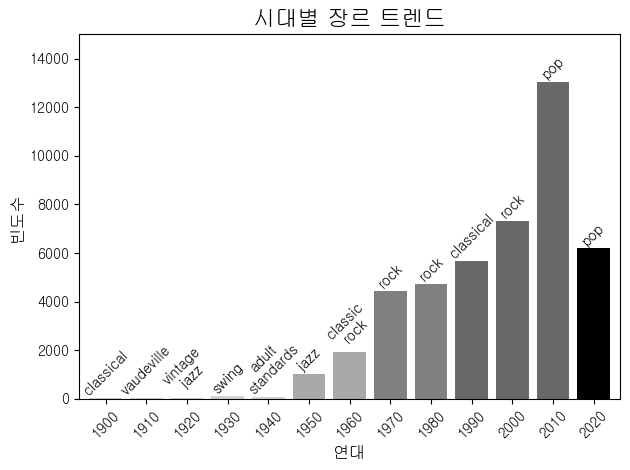

In [126]:
# 시대별 장르 시각화
plt.figure(figsize=(12, 10))
bar_colors = ['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey',
              'darkgrey', 'darkgray', 'grey', 'gray', 'dimgrey',
              'dimgray', 'dimgray', 'black']
top_frequent_genres.plot(
    kind='bar',
    x='decade',
    y='count',
    width=0.8,
    color=bar_colors,
    legend=False
)

plt.title('시대별 장르 트렌드', fontsize=16)
plt.xlabel('연대', fontsize=12)
plt.ylabel('빈도수', fontsize=12)

for i, val in enumerate(top_frequent_genres['count']):
    plt.text(i, val+100, top_frequent_genres['genres'].iloc[i].replace(' ', '\n'), ha='center', rotation=45)

plt.xticks(rotation=45)
plt.ylim(0, 15000)
plt.tight_layout()
plt.show()

---
다양한 장르 지표 구하기

In [ ]:
# 상위 5%의 row를 추린 후 각각을 Series화 -> 리스트 형태를 분리하기 위함
ser_genre = df_genre['genres'][df_star[df_star['popularity'] >= trend5_threshold].index].apply(pd.Series)
ser_genre

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,lilith,new wave pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,conscious hip hop,hip hop,north carolina hip hop,rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,emo rap,miami hip hop,rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,latin hip hop,puerto rican pop,reggaeton,trap latino,urbano latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751095,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
751096,pop argentino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
751287,pop rap brasileiro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
751371,russelater,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
# 상위 10개 뽑기
top10_genre_stack = ser_genre.stack()
top10_genre_stack

1       0                     lilith
        1               new wave pop
7       0          conscious hip hop
        1                    hip hop
        2     north carolina hip hop
                      ...           
751371  0                 russelater
751499  0                   agronejo
        1                  sertanejo
        2              sertanejo pop
        3    sertanejo universitario
Length: 124933, dtype: object

In [ ]:
# 상위 5% 이내 최다 장르를 10개만 추려 집계
ser_genre.stack().value_counts()

pop                     4964
rap                     3361
rock                    3046
hip hop                 2062
urbano latino           1827
                        ... 
musica santomense          1
dalarna indie              1
fictitious orchestra       1
ukrainian pop              1
cleveland metal            1
Name: count, Length: 2579, dtype: int64

In [164]:
top10_genre = ser_genre.stack().value_counts().head(10)

In [184]:
top10_genre

pop              4964
rap              3361
rock             3046
hip hop          2062
urbano latino    1827
dance pop        1665
trap latino      1521
modern rock      1387
latin pop        1372
reggaeton        1361
Name: count, dtype: int64

In [172]:
top10_genre.values.sum()

np.int64(22566)

In [186]:
top10_genre_stack.index

MultiIndex([(     1, 0),
            (     1, 1),
            (     7, 0),
            (     7, 1),
            (     7, 2),
            (     7, 3),
            (    14, 0),
            (    18, 0),
            (    18, 1),
            (    18, 2),
            ...
            (751070, 0),
            (751070, 1),
            (751095, 0),
            (751096, 0),
            (751287, 0),
            (751371, 0),
            (751499, 0),
            (751499, 1),
            (751499, 2),
            (751499, 3)],
           length=124933)

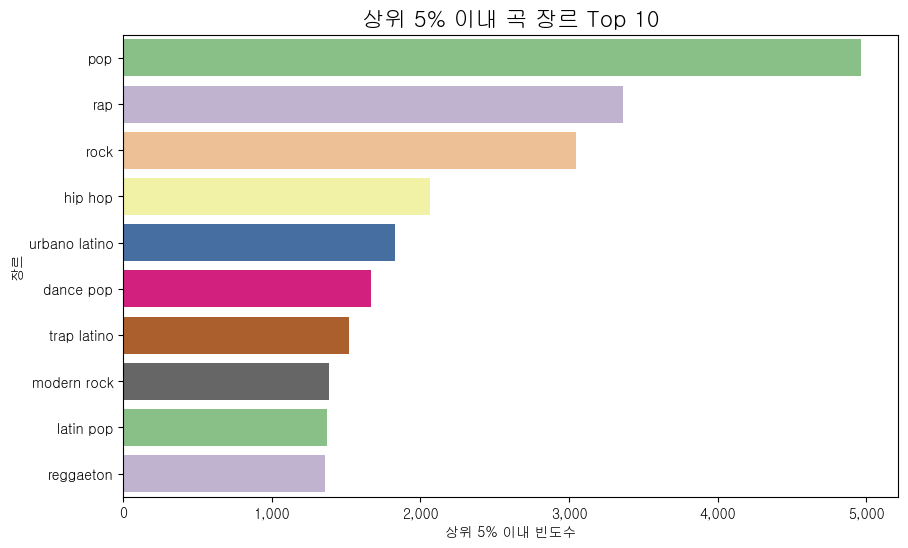

In [ ]:
# 상위 5% 이내 10개 장르 시각화
from matplotlib.ticker import StrMethodFormatter

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=top10_genre.values,
    y=top10_genre.index,
    palette='Accent',
    hue=top10_genre.index,
    legend=False
)

ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.title('상위 5% 이내 곡 장르 Top 10', fontsize=16)
plt.xlabel('상위 5% 이내 빈도수')
plt.ylabel('장르')

plt.show()

In [187]:
top10_genre_index = pd.Series([x[0] for x in top10_genre_stack.index])
top10_genre_index

0              1
1              1
2              7
3              7
4              7
           ...  
124928    751371
124929    751499
124930    751499
124931    751499
124932    751499
Length: 124933, dtype: int64

In [188]:
top10_genre_index.unique()

array([     1,      7,     14, ..., 751287, 751371, 751499],
      shape=(41887,))

In [189]:
decade_trends = df.iloc[top10_genre_index.unique()].groupby('decade')['hit_category'].count()
decade_trends

decade
1930        2
1940        4
1950       97
1960      499
1970     1174
1980     1476
1990     2880
2000     5284
2010    13614
2020    16857
Name: hit_category, dtype: int64

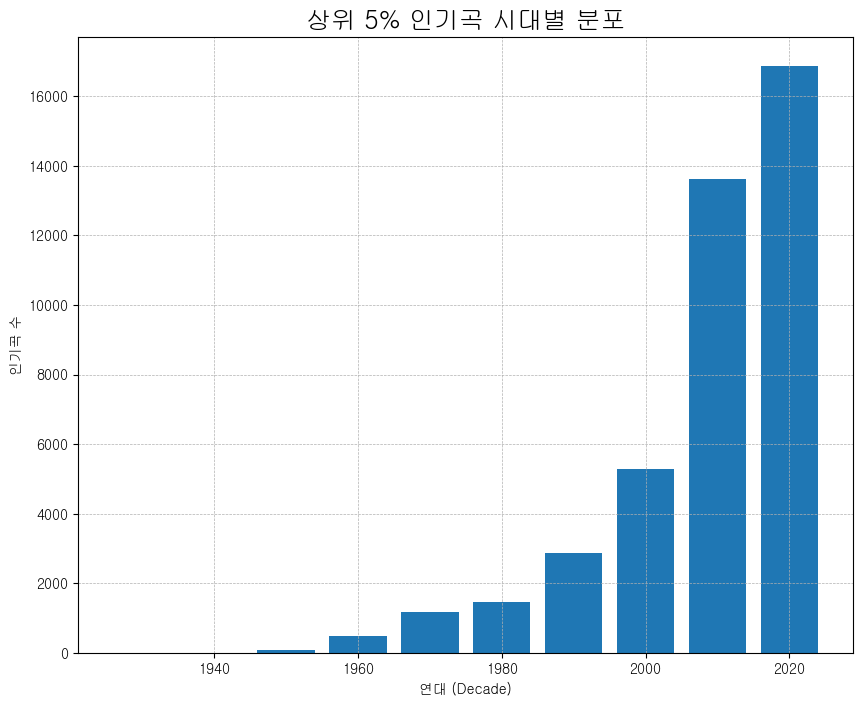

In [191]:
# 상위 5% 곡의 시대별 분포 시각화
plt.figure(figsize=(10, 8))

plt.bar(decade_trends.index, decade_trends.values, width=8)

plt.title('상위 5% 인기곡 시대별 분포', fontsize=18)
plt.xlabel('연대 (Decade)')
plt.ylabel('인기곡 수')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()